# Here we'll go over some of the main features of pytorch. Tldr it's just like numpy

In [1]:
import torch
import numpy as np

Pytorch has tensors as its fundamental unit, which behave in most cases just like numpy arrays. The syntax is the same for many cases, because they wanted to make pytorch easy for numpy users.

In [2]:
# you can make zero tensors/arrays
zerostorch = torch.zeros((5,5))
zerosnumpy = np.zeros((5,5))

# gaussian random entries (note the slight difference between the two functions, one has "random." the other doesn't)
randtorch = torch.randn(5,5) 
randnumpy = np.random.randn(5,5)

Torch objects have the usual array attributes (shape, len, dtype, etc.) but they also have torch specific ones, like device and requires_grad. Device tells you whether the object is stored on cpu or gpu. Requires grad tells you whether you will need to take derivatives (**grad**ients) with respect to this object at any point (this will be covered in the second notebook). 

In [3]:
print("Shape: ", randtorch.shape)
print("Device: ", randtorch.device)
print("Requires grad? ", randtorch.requires_grad)

Shape:  torch.Size([5, 5])
Device:  cpu
Requires grad?  False


We can move the object to gpu like this:

In [4]:
randtorch_gpu = randtorch.to(torch.device('cuda:0'))
print("Device: ", randtorch.device)
print("Device: ", randtorch_gpu.device)

Device:  cpu
Device:  cuda:0


### Note that you cannot plot gpu tensors, because they can't be cast to numpy

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

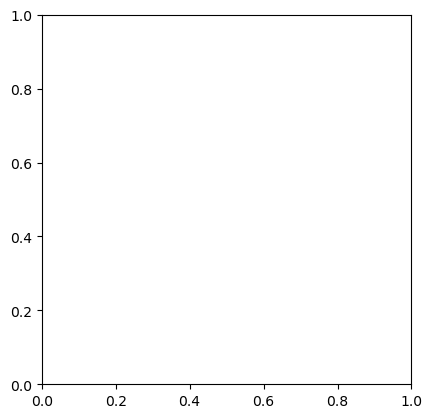

In [5]:
import matplotlib.pyplot as plt

plt.imshow(randtorch_gpu) # works with tensor on cpu

# Operations on tensors
Just like numpy

In [6]:
A = torch.randn(3,3)
B = torch.randn(3,6)

# matrix multiplication
print(A@B)

# some functions
print(torch.sin(A))
print(torch.pow(A, 2)) # elementwise A**2
print(torch.exp(A))

# linalg operations (SVD, eigenvalue decomposition, etc.)
w, v = torch.linalg.eig(A) # w are eigenvalues, each column of v is an eigenvector
print(w)

tensor([[ 0.6224, -0.3535,  0.0351, -0.4662, -0.4296,  0.0251],
        [ 1.6623,  0.1259, -0.3091, -1.3603, -1.3418, -0.3308],
        [ 2.0188, -0.1931, -0.8342, -2.8483, -0.8446, -1.0969]])
tensor([[ 0.1420,  0.3368,  0.2343],
        [-0.1631,  0.8359,  0.7434],
        [ 0.3778,  0.2412,  0.9425]])
tensor([[0.0203, 0.1180, 0.0559],
        [0.0269, 0.9798, 0.7024],
        [0.1501, 0.0594, 1.5132]])
tensor([[1.1531, 1.4099, 1.2668],
        [0.8489, 2.6908, 2.3119],
        [1.4732, 1.2759, 3.4217]])
tensor([0.3478+0.1186j, 0.3478-0.1186j, 1.6669+0.0000j])


### Objects have to be on the same device to operate on them.

In [7]:
A = torch.randn(3,3) # on cpu
B = torch.randn(3,6, device=torch.device('cuda:0')) # on gpu

# matrix multiplication
print(A@B)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

### This is a common error that arises when writing NNs, it just means you need to put everything onto the same device.

In [8]:
A = torch.randn(3,3)
B = torch.randn(3,6, device=torch.device('cuda:0'))

A = A.to(torch.device('cuda:0')) # move to gpu

# matrix multiplication
print(A@B)

tensor([[ 0.8249, -2.8165, -2.3008, -1.4912,  0.4186, -1.5326],
        [-0.7689, -0.7505,  1.6143, -0.3710, -0.6726, -0.5709],
        [-1.7097,  1.1997, -1.4349,  1.6070,  3.7437, -0.9055]],
       device='cuda:0')


# Summary of important methods.

- `device = torch.device('cuda:0')` # this is the gpu
- `A = torch.from_numpy(A)` cast numpy array to tensor
- `A = A.to(device)` move tensor to gpu
- `A.cpu()` move to cpu
- `A.detach()` stop recording gradients
- `A.numpy()` cast to numpy (can only do after moving to cpu and detaching: A.detach().cpu().numpy())